# ĐỀ THI NHẬP MÔN AI

In [ ]:
#MSSV:2374802010145
#HỌ VÀ TÊN:Đào Văn Hòa

# CÂU 1: TÌM BFS THEO ĐỒ THỊ BÊN DƯỚI BẰNG PYTHON

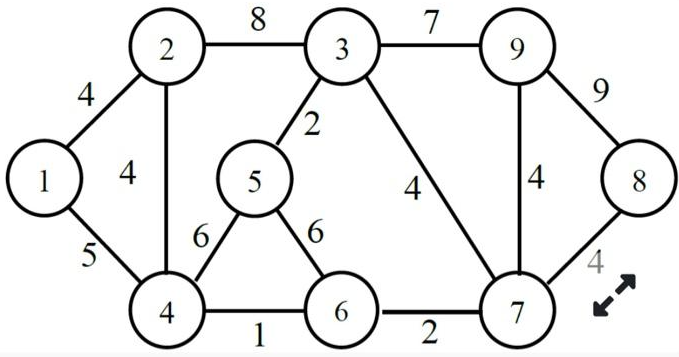

In [10]:
from collections import deque

def bfs_weighted(graph, start, goal):
    """
    BFS có trọng số đơn giản: tìm đường ít cạnh nhất (không tối ưu về trọng số),
    đồng thời cộng dồn trọng số trên đường đi tìm được.
    Trả về: (path, total_weight)
    """
    queue = deque([(start, [start], 0)])  # (nút hiện tại, đường đi, tổng trọng số)
    visited = set([start])
    
    while queue:
        node, path, total_weight = queue.popleft()
        if node == goal:
            return path, total_weight
        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor], total_weight + weight))
    return None, 0

if __name__ == "__main__":
    # Định nghĩa đồ thị có trọng số (đồ thị vô hướng)
    graph_question1 = {
        1: [(2,4), (4,5)],
        2: [(1,4), (3,8), (4,4)],
        3: [(2,8), (5,2), (7,4), (9,7)],
        4: [(1,5), (2,4), (5,6), (6,1)],
        5: [(3,2), (4,6), (6,6)],
        6: [(4,1), (5,6), (7,2)],
        7: [(3,4), (6,2), (8,4), (9,4)],
        8: [(7,4), (9,9)],
        9: [(3,7), (7,4), (8,9)]
    }

    path, total_weight = bfs_weighted(graph_question1, start=1, goal=8)
    print("Đường đi BFS (ít cạnh nhất) từ 1 đến 8 là:", path)
    print("Tổng trọng số trên đường đó là:", total_weight)


Đường đi BFS (ít cạnh nhất) từ 1 đến 8 là: [1, 2, 3, 7, 8]
Tổng trọng số trên đường đó là: 20


# CÂU 2: Tối ưu hóa hàm một biến

Tìm $x$ sao cho  
$$
f(x) = x^3 - 9x^2 + 24x - 10
$$  
đạt giá trị lớn nhất trong khoảng  
$$
x \in [0, 6].
$$

Thế hệ 1: x = 5.9550, f(x) = 24.9387
Thế hệ 2: x = 5.9550, f(x) = 24.9387
Thế hệ 3: x = 5.9550, f(x) = 24.9387
Thế hệ 4: x = 5.9103, f(x) = 24.9387
Thế hệ 5: x = 5.8709, f(x) = 23.9183
Thế hệ 6: x = 5.8682, f(x) = 23.0486
Thế hệ 7: x = 5.8669, f(x) = 22.9907
Thế hệ 8: x = 5.8669, f(x) = 22.9618
Thế hệ 9: x = 5.8669, f(x) = 22.9618
Thế hệ 10: x = 5.8669, f(x) = 22.9618
Thế hệ 11: x = 5.9396, f(x) = 22.9618
Thế hệ 12: x = 5.9030, f(x) = 24.5826
Thế hệ 13: x = 5.9029, f(x) = 23.7552
Thế hệ 14: x = 5.9029, f(x) = 23.7543
Thế hệ 15: x = 5.9029, f(x) = 23.7543
Thế hệ 16: x = 5.9281, f(x) = 23.7543
Thế hệ 17: x = 5.9121, f(x) = 24.3206
Thế hệ 18: x = 5.9825, f(x) = 23.9597
Thế hệ 19: x = 5.9825, f(x) = 25.5825
Thế hệ 20: x = 5.9825, f(x) = 25.5825
Thế hệ 21: x = 5.9623, f(x) = 25.5825
Thế hệ 22: x = 5.9617, f(x) = 25.1085
Thế hệ 23: x = 5.9591, f(x) = 25.0935
Thế hệ 24: x = 5.9576, f(x) = 25.0328
Thế hệ 25: x = 5.9574, f(x) = 24.9974
Thế hệ 26: x = 5.9574, f(x) = 24.9950
Thế hệ 27: x = 5.9574

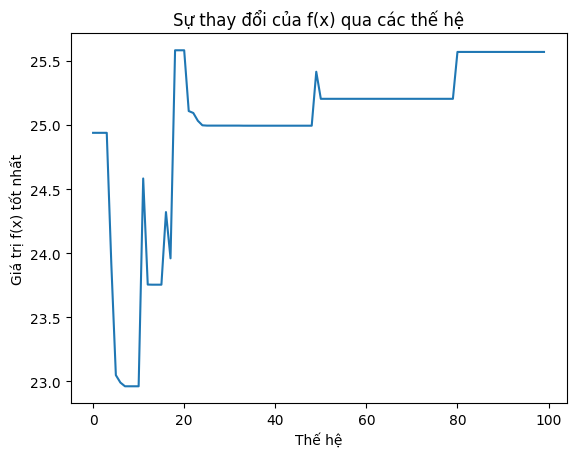


Kết quả cuối cùng: x = 5.9819, f(x) = 25.5696


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Hàm mục tiêu cho câu 2
def fitness_function(x):
    return x**3 - 9*x**2 + 24*x - 10

# Khởi tạo quần thể
def initialize_population(pop_size, min_val, max_val):
    return [random.uniform(min_val, max_val) for _ in range(pop_size)]

# Lựa chọn (Tournament Selection)
def select_parents(population, fitness_values, tournament_size=3):
    selected = random.sample(range(len(population)), tournament_size)
    best_idx = max(selected, key=lambda i: fitness_values[i])
    return population[best_idx]

# Lai ghép
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        return (parent1 + parent2) / 2
    return parent1

# Đột biến
def mutate(individual, mutation_rate=0.1, min_val=0, max_val=6):
    if random.random() < mutation_rate:
        return random.uniform(min_val, max_val)
    return individual

# Thuật toán di truyền cho câu 2
def genetic_algorithm_question2(pop_size=50, generations=100, min_val=0, max_val=6):
    population = initialize_population(pop_size, min_val, max_val)
    best_fitness_history = []
    
    for generation in range(generations):
        fitness_values = [fitness_function(x) for x in population]
        best_fitness = max(fitness_values)
        best_fitness_history.append(best_fitness)
        
        new_population = []
        for _ in range(pop_size):
            parent1 = select_parents(population, fitness_values)
            parent2 = select_parents(population, fitness_values)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population
        best_individual = population[np.argmax([fitness_function(x) for x in population])]
        print(f'Thế hệ {generation + 1}: x = {best_individual:.4f}, f(x) = {best_fitness:.4f}')
    
    best_fitness = max([fitness_function(x) for x in population])
    best_individual = population[np.argmax([fitness_function(x) for x in population])]
    
    # Trực quan hóa
    plt.plot(range(generations), best_fitness_history)
    plt.xlabel('Thế hệ')
    plt.ylabel('Giá trị f(x) tốt nhất')
    plt.title('Sự thay đổi của f(x) qua các thế hệ')
    plt.show()
    
    return best_individual, best_fitness

# Chạy thuật toán cho câu 2
best_x, best_f = genetic_algorithm_question2()
print(f'\nKết quả cuối cùng: x = {best_x:.4f}, f(x) = {best_f:.4f}')

# CÂU 3: Triển khai thuật toán di truyền để tìm giá trị tối ưu của hàm số sau:

$$
f(x, y) = -(x^2 + y^2) + 10x + 8y + 50
$$

trong miền xác định:

$$
x, y \in [-5, 5].
$$

1. **Triển khai thuật toán di truyền bằng Python**:
   - **Biểu diễn lời giải**: Mỗi cá thể (chromosome) là một cặp số thực $(x, y)$.
   - **Hàm đánh giá (fitness function)**: Dựa trên giá trị của $f(x, y)$, với mục tiêu tìm giá trị lớn nhất.
   - **Toán tử di truyền**:
     - **Chọn lọc**: Sử dụng phương pháp tournament selection (chọn ngẫu nhiên $k=3$ cá thể, lấy cá thể tốt nhất).
     - **Lai ghép**: Triển khai lai ghép số học (arithmetic crossover), ví dụ: $x_{\text{new}} = \alpha x_1 + (1-\alpha) x_2$, với $\alpha$ ngẫu nhiên trong $[0, 1]$.
     - **Đột biến**: Áp dụng đột biến bằng cách thêm nhiễu Gaussian (mean=0, std=0.1) vào $x$ hoặc $y$, với xác suất đột biến nhỏ.
   - **Tham số**:
     - Kích thước quần thể: 50 cá thể.
     - Số thế hệ: 100 thế hệ.
     - Xác suất lai ghép: 0.8.
     - Xác suất đột biến: 0.05.
2. **Kết quả đầu ra**:
   - In ra giá trị tối ưu (gần đúng) của $f(x, y)$ và tọa độ $(x, y)$ tương ứng.
   - In ra giá trị hàm $f(x, y)$ tốt nhất qua từng thế hệ để theo dõi sự hội tụ.

Thế hệ   1: Best fitness = 90.5065 tại (x,y)=(4.4149,4.3887)
Thế hệ   2: Best fitness = 90.1682 tại (x,y)=(4.1949,4.4285)
Thế hệ   3: Best fitness = 90.5634 tại (x,y)=(4.3438,4.0778)
Thế hệ   4: Best fitness = 90.5378 tại (x,y)=(4.3593,3.7726)
Thế hệ   5: Best fitness = 90.5829 tại (x,y)=(4.3963,3.7705)
Thế hệ   6: Best fitness = 90.5829 tại (x,y)=(4.3963,3.7705)
Thế hệ   7: Best fitness = 90.5865 tại (x,y)=(4.4159,3.7310)
Thế hệ   8: Best fitness = 90.6678 tại (x,y)=(4.5271,3.6705)
Thế hệ   9: Best fitness = 90.6574 tại (x,y)=(4.5052,3.6872)
Thế hệ  10: Best fitness = 90.6573 tại (x,y)=(4.4993,3.6966)
Thế hệ  11: Best fitness = 90.6573 tại (x,y)=(4.4993,3.6966)
Thế hệ  12: Best fitness = 90.6673 tại (x,y)=(4.4314,3.9031)
Thế hệ  13: Best fitness = 90.6861 tại (x,y)=(4.5227,3.7066)
Thế hệ  14: Best fitness = 90.6987 tại (x,y)=(4.5372,3.7048)
Thế hệ  15: Best fitness = 90.7075 tại (x,y)=(4.5146,3.7614)
Thế hệ  16: Best fitness = 90.7759 tại (x,y)=(4.5622,3.8199)
Thế hệ  17: Best fitness

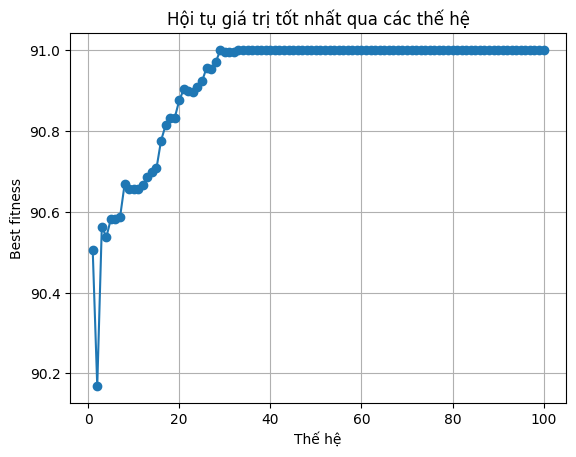

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Hàm mục tiêu
def fitness(x, y):
    return -(x**2 + y**2) + 10*x + 8*y + 50

# Các tham số
POP_SIZE       = 50
GENERATIONS    = 100
CROSSOVER_PROB = 0.8
MUTATION_PROB  = 0.05

# Khởi tạo quần thể ban đầu
population = [
    (random.uniform(-5,5), random.uniform(-5,5))
    for _ in range(POP_SIZE)
]

# Tournament selection (k=3)
def tournament_selection(pop, k=3):
    contenders = random.sample(pop, k)
    return max(contenders, key=lambda ind: fitness(ind[0], ind[1]))

# Arithmetic crossover
def arithmetic_crossover(p1, p2):
    alpha = random.random()
    c1 = ( alpha*p1[0] + (1-alpha)*p2[0],
           alpha*p1[1] + (1-alpha)*p2[1] )
    c2 = ( (1-alpha)*p1[0] + alpha*p2[0],
           (1-alpha)*p1[1] + alpha*p2[1] )
    return c1, c2

# Gaussian mutation
def gaussian_mutation(ind):
    x, y = ind
    if random.random() < MUTATION_PROB:
        x += random.gauss(0, 0.1)
    if random.random() < MUTATION_PROB:
        y += random.gauss(0, 0.1)
    # giữ giới hạn [-5,5]
    x = max(-5, min(5, x))
    y = max(-5, min(5, y))
    return (x, y)

# Theo dõi lịch sử best fitness mỗi thế hệ
best_history = []

# Chạy GA qua các thế hệ
for gen in range(1, GENERATIONS+1):
    # Tính fitness cho từng cá thể
    fitness_vals = [fitness(x,y) for x,y in population]
    # Tìm best trong thế hệ
    idx_best = np.argmax(fitness_vals)
    best_val = fitness_vals[idx_best]
    best_ind = population[idx_best]
    best_history.append(best_val)
    
    # In thông tin thế hệ
    print(f"Thế hệ {gen:3d}: Best fitness = {best_val:.4f} tại (x,y)=({best_ind[0]:.4f},{best_ind[1]:.4f})")
    
    # Tạo quần thể mới
    new_pop = []
    while len(new_pop) < POP_SIZE:
        p1 = tournament_selection(population)
        p2 = tournament_selection(population)
        if random.random() < CROSSOVER_PROB:
            c1, c2 = arithmetic_crossover(p1, p2)
        else:
            c1, c2 = p1, p2
        c1 = gaussian_mutation(c1)
        c2 = gaussian_mutation(c2)
        new_pop.append(c1)
        if len(new_pop) < POP_SIZE:
            new_pop.append(c2)
    population = new_pop

# Kết quả chung sau 100 thế hệ
overall_best_val = max(best_history)
overall_best_gen = best_history.index(overall_best_val) + 1
print("\n=== KẾT QUẢ CHUNG ===")
print(f"Trong {GENERATIONS} thế hệ, giá trị tốt nhất đạt được là {overall_best_val:.4f} ở thế hệ {overall_best_gen}")

# Vẽ đồ thị hội tụ
plt.figure()
plt.plot(range(1, GENERATIONS+1), best_history, marker='o')
plt.xlabel("Thế hệ")
plt.ylabel("Best fitness")
plt.title("Hội tụ giá trị tốt nhất qua các thế hệ")
plt.grid(True)
plt.show()


# CÂU 4: NAIVE BAYES 

**Tập dữ liệu**: Dữ liệu về quyết định mua máy tính của 14 khách hàng, với các đặc trưng: Age (youth, middle_aged, senior), Income (low, medium, high), Student (yes, no), Credit_rating (fair, excellent), và nhãn Buys_computer (yes, no).

| ID | Age         | Income | Student | Credit_rating | Buys_computer |
|----|-------------|--------|---------|---------------|---------------|
| 1  | youth       | high   | no      | fair          | no            |
| 2  | youth       | high   | no      | excellent     | no            |
| 3  | middle_aged | high   | no      | fair          | yes           |
| 4  | senior      | medium | no      | fair          | yes           |
| 5  | senior      | low    | yes     | fair          | yes           |
| 6  | senior      | low    | yes     | excellent     | no            |
| 7  | middle_aged | low    | yes     | excellent     | yes           |
| 8  | youth       | medium | no      | fair          | no            |
| 9  | youth       | low    | yes     | fair          | yes           |
| 10 | senior      | medium | yes     | fair          | yes           |
| 11 | youth       | medium | yes     | excellent     | yes           |
| 12 | middle_aged | medium | no      | excellent     | yes           |
| 13 | middle_aged | high   | yes     | fair          | yes           |
| 14 | senior      | medium | no      | excellent     | no            |

1. **Triển khai thuật toán Naive Bayes từ đầu**:
   - **Biểu diễn dữ liệu**: Lưu trữ tập dữ liệu trong chương trình (dùng danh sách, dictionary, hoặc pandas DataFrame).
   - **Tính xác suất**:
     - Tính xác suất trước (prior probabilities) cho lớp Buys_computer (Yes/No).
     - Tính xác suất có điều kiện (likelihood) cho từng giá trị của các đặc trưng (Age, Income, Student, Credit_rating) đối với từng lớp.
   - **Dự đoán**: Viết hàm dự đoán nhãn Buys_computer cho một mẫu dữ liệu mới dựa trên thuật toán Naive Bayes.
   - **Xử lý dữ liệu categorical**: Chuyển đổi các giá trị categorical thành dạng số hoặc xử lý trực tiếp trong tính toán xác suất.
2. **Dự đoán mẫu mới**:
   - Sử dụng chương trình để dự đoán nhãn Buys_computer cho mẫu: Age = youth, Income = medium, Student = yes, Credit_rating = fair.
   - In ra xác suất dự đoán cho cả hai lớp (Yes và No) và nhãn cuối cùng.

In [ ]:
import pandas as pd

# 1. Đọc và biểu diễn dữ liệu
data = pd.read_csv('buys_computer_data.csv')  # đọc tập dữ liệu
# Nếu dùng file CSV: data = pd.read_csv('buys_computer_data.csv')

# Xem trước vài dòng dữ liệu (tuỳ ý)
print("Dữ liệu (một vài mẫu):")
print(data.head(), "\n")

# 2. Tính xác suất tiên nghiệm P(yes), P(no)
prior = data['Buys_computer'].value_counts() / len(data)
print("Xác suất tiên nghiệm (prior):")
print(prior, "\n")  # Ví dụ: yes: 9/14, no: 5/14

# 3. Tính xác suất có điều kiện P(feature = value | class)
#    Tính tần suất của mỗi giá trị đặc trưng theo từng lớp
likelihood = {}
for feature in ['Age', 'Income', 'Student', 'Credit_rating']:
    # Nhóm theo (class, giá trị_feature), chia cho P(class) để ra P(feature|class)
    likelihood[feature] = data.groupby(['Buys_computer', feature]) \
                                .size().div(len(data)).div(prior)
    print(f"Xác suất có điều kiện P({feature}|class):")
    print(likelihood[feature])
    print()

# 4. Hàm Naive Bayes dự đoán cho mẫu mới
def predict(sample, prior, likelihood):
    """
    sample: dict như {'Age': val, 'Income': val, ...}
    prior: Series chứa P(class)
    likelihood: dict của Series chứa P(feature=value | class)
    """
    probs = {}
    for cls in prior.index:  # cls lần lượt 'no', 'yes'
        # khởi tạo với xác suất tiên nghiệm P(cls)
        prob = prior[cls]
        for feature, val in sample.items():
            # nhân với P(feature=val | class=cls)
            prob *= likelihood[feature].get((cls, val), 0)
        probs[cls] = prob
    # Lựa chọn lớp có xác suất lớn nhất
    predicted = max(probs, key=probs.get)
    return probs, predicted

# 5. Dự đoán cho mẫu mới: Age=youth, Income=medium, Student=yes, Credit_rating=fair
new_sample = {'Age': 'youth', 'Income': 'medium', 'Student': 'yes', 'Credit_rating': 'fair'}
probs, label = predict(new_sample, prior, likelihood)

print("Dự đoán cho mẫu mới:")
print(f"  P(yes) = {probs.get('yes', 0):.6f}")
print(f"  P(no ) = {probs.get('no',  0):.6f}")
print(f"  Nhãn dự đoán = {label}")


ValueError: Excel file format cannot be determined, you must specify an engine manually.